In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.shape

(6745, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
#Convert Request_timestamp to uniform datetime format
df["Request timestamp"] = df["Request timestamp"].apply(lambda x : pd.to_datetime(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [6]:
#Convert drop_timestamp to uniform datetime format
df["Drop timestamp"] = df["Drop timestamp"].apply(lambda x : pd.to_datetime(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [7]:
#Check for null values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [9]:
#Check if the Driver id is null only for 'No Cars Available' Status
df[(df.Status == 'No Cars Available') & (df["Driver id"].isnull())].shape

(2650, 6)

In [10]:
#Check if drop timestamp is null only for 'No Cars Available' & 'Cancelled'
df[(df.Status == 'No Cars Available') | (df.Status == 'Cancelled') & (df["Drop timestamp"].isnull())].shape

(3914, 6)

In [11]:
#Extract the hour from requested timestamp
df["Request hour"] = df["Request timestamp"].dt.hour
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


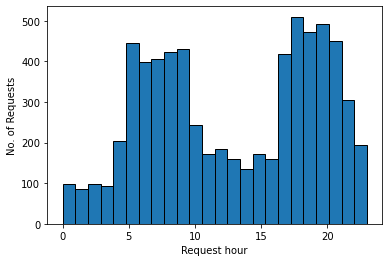

In [12]:
plt.hist(df["Request hour"],edgecolor='black',bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()
#Demand is more during evening hours

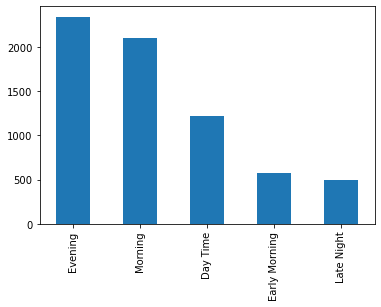

In [13]:
#divide the time of the day into five categories
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

    
df['Time slot'] = df['Request hour'].apply(lambda x: time_period(x))
df['Time slot'].value_counts().plot.bar()
plt.show()
#Maximum demand during 'Evening' hours

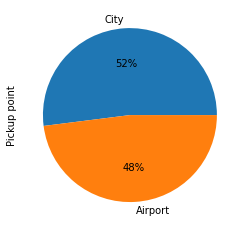

In [14]:
df["Pickup point"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

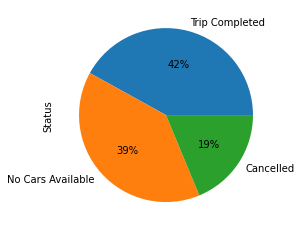

In [15]:
df["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()
#More than half of the requests are either cancelled or on wait due to unavailability of cabs

In [16]:
df["Count"] = 1
uber_city = df[df["Pickup point"]=="City"]
uber_airport = df[df["Pickup point"]=="Airport"]

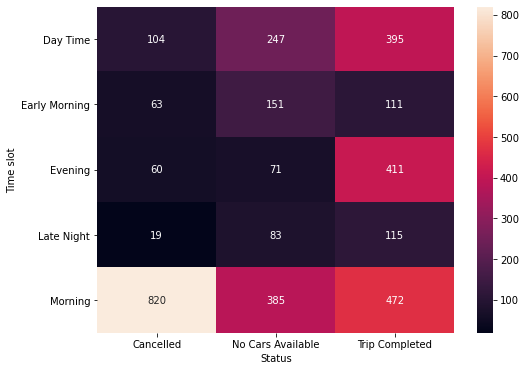

In [17]:
#Availability matrix for requests with Pickup point as City
pivot_city = pd.pivot_table(uber_city,index = "Time slot",columns = "Status",values = "Count",aggfunc=np.sum)
plt.figure(figsize = [8,6])
hm = sns.heatmap(data = pivot_city, annot = True, fmt='g')
plt.show()

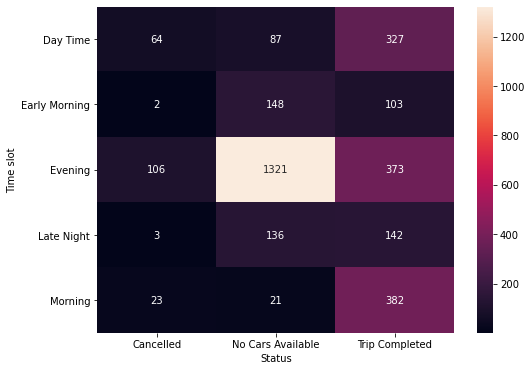

In [18]:
#Availability matrix for requests with Pickup point as Airport
pivot_airport = pd.pivot_table(uber_airport,index = "Time slot",columns = "Status",values = "Count",aggfunc=np.sum)
plt.figure(figsize = [8,6])
hm = sns.heatmap(data = pivot_airport, annot = True, fmt='g')
plt.show()

In [19]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time slot,Count
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,1


<AxesSubplot:xlabel='Time slot', ylabel='count'>

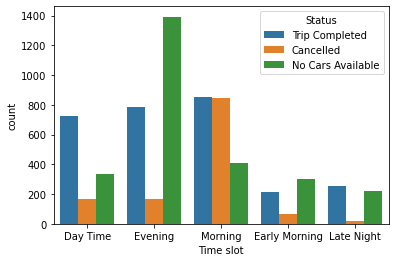

In [20]:
# Plot to find the count of the three requests, according to the defined time slots
sns.countplot(x=df['Time slot'],hue =df['Status'] ,data = df)

<AxesSubplot:xlabel='Pickup point,Time slot'>

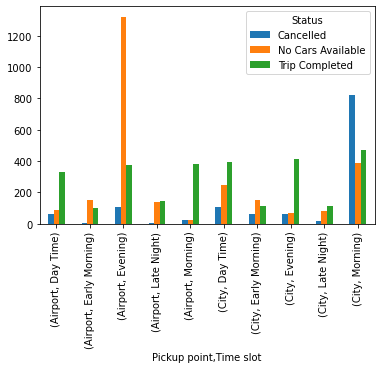

In [21]:
# Plot to find the count of the status, according to both pickup point and the time slot
pickup_df = pd.DataFrame(df.groupby(['Pickup point','Time slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

Conclusions from above plot :

No Cars Available are in the Evening.
Cancelled trips are in the Morning.

In [22]:
#As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
df['Demand'] = 1

In [23]:
#As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
df['Supply'] = 0
df.loc[(df['Status'] == 'Trip Completed'),'Supply'] = 1
#Demand Supply Gap can be defined as a difference between Demand and Supply
df['Gap'] = df['Demand'] - df['Supply']
df.loc[df['Gap']==0,'Gap'] = 'Trip Completed'
df.loc[df['Gap']==1,'Gap'] = 'Trip Not Completed'

<AxesSubplot:xlabel='Gap', ylabel='count'>

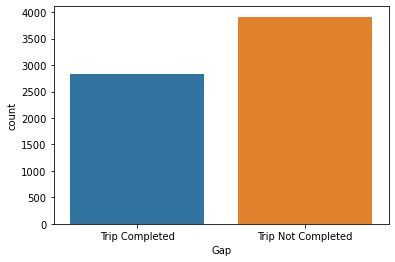

In [24]:
#Plot to count the number of requests that was completed and which was not
sns.countplot(x=df['Gap'], data = df)

<AxesSubplot:xlabel='Time slot'>

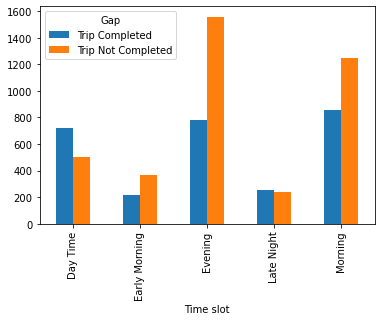

In [25]:
#Plot to count the number of requests that was completed and which was not, against the time slot
gap_timeslot_df = pd.DataFrame(df.groupby(['Time slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

<AxesSubplot:xlabel='Pickup point'>

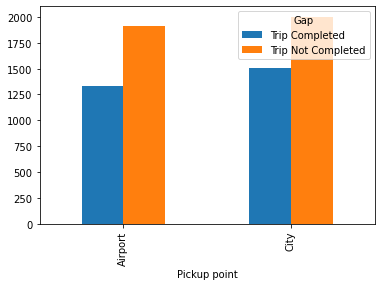

In [26]:
#Plot to count the number of requests that was completed and which was not, against pickup point
gap_pickup_df = pd.DataFrame(df.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

<AxesSubplot:xlabel='Time slot,Pickup point'>

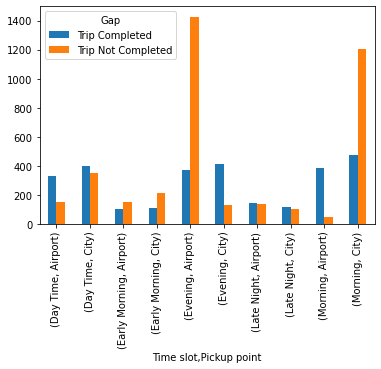

In [27]:
#Plot to count the number of requests that was completed and which was not, for the final analysis
gap_main_df = pd.DataFrame(df.groupby(['Time slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

Pickup Point - City :
As per the analysis, the morning time slot is most problematic where the requests are being cancelled. 
Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing 
the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city.

Pickup Point - Airport :
Upon analysis, the evening time slot seems to be most problematic for pickup points as airport where the requests being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city.